In [1]:
from board import Board
from env import Env
from qtypes import *
from striga_scheme import StrigaDeterministicMovementScheme
from train import train
from witcher_scheme import WitcherMovementSchemeSARSA
from visualize import visualize

In [2]:
width = 7
height = 7
walls = [
    Position(width - 2, 0),
    Position(width - 2, 1),
    Position(width - 1, 1)
]
castle_position = Position(width - 1, 0)
board = Board(width, height, castle_position, walls)
striga = Striga(StrigaDeterministicMovementScheme(board, 3))
witcher = Witcher(WitcherMovementSchemeSARSA(board))
initial_state = QState(Position(0, 0), Position(3, 3))

train(board, striga, witcher, initial_state)

0 0 648
1 0 744
1 0 1038
1 0 1398
1 0 1488
1 0 2256
2 0 2352
2 0 2502
3 0 2592
3 0 2880
4 0 3024
5 0 3096
5 0 3450
5 0 3648
7 0 3744
8 0 3906
8 0 4008
10 0 4098
10 0 4392
10 0 4554
11 0 4632
11 0 4716
14 1 4825
15 1 4909
18 2 4944
19 2 5066
20 2 5132
20 2 5162
21 2 5426
24 3 5683
25 3 5901
25 3 5979
25 3 6003
27 3 6747
28 3 6945
28 3 7689
28 3 7731
29 3 7875
32 4 7974
32 4 8020
33 4 8206
35 4 8302
35 4 8326
35 4 8404
37 4 8524
40 5 8703
43 6 8746
43 6 8790
44 6 8814
47 7 9023
48 7 9145
49 7 9229
49 7 9271
52 8 9390
55 9 9637
55 9 9699
58 10 9890
59 10 10060
59 10 10066
62 11 10209
65 12 10276
66 12 10332
69 13 10421
72 14 10492
72 14 10502
75 15 10555
78 16 10640
79 16 10720
82 17 10791
85 18 10822
85 18 10842
87 18 10938
90 19 10983
90 19 11065
90 19 11401
91 19 11419
92 19 11503
92 19 11515
94 19 11677
97 20 11786
100 21 11833
101 21 11877
104 22 11908
104 22 11956
107 23 12069
110 24 12206
111 24 12216
111 24 12252
113 24 12288
116 25 12333
119 26 12390
122 27 12483
125 28 12548
127

1450 421 47767
1453 422 47840
1456 423 47865
1459 424 47890
1462 425 47957
1465 426 47982
1468 427 48023
1471 428 48118
1474 429 48161
1477 430 48262
1480 431 48297
1482 431 48323
1483 431 48335
1486 432 48382
1489 433 48421
1492 434 48446
1495 435 48487
1498 436 48584
1501 437 48641
1504 438 48684
1507 439 48783
1510 440 48844
1510 440 48872
1513 441 48907
1516 442 48934
1519 443 48995
1522 444 49068
1525 445 49095
1528 446 49142
1531 447 49193
1534 448 49280
1537 449 49325
1540 450 49360
1543 451 49409
1545 451 49489
1548 452 49532
1551 453 49569
1554 454 49852
1557 455 49931
1560 456 49972
1563 457 50041
1566 458 50116
1569 459 50143
1572 460 50208
1572 460 50308
1575 461 50335
1578 462 50388
1581 463 50427
1584 464 50588
1586 464 50624
1589 465 50825
1592 466 50864
1592 466 50884
1595 467 50925
1597 467 50939
1600 468 51010
1603 469 51061
1606 470 51086
1609 471 51111
1612 472 51360
1615 473 51389
1618 474 51432
1621 475 51469
1623 475 51493
1626 476 51526
1628 476 51578
1631 477 5

<IPython.core.display.Javascript object>


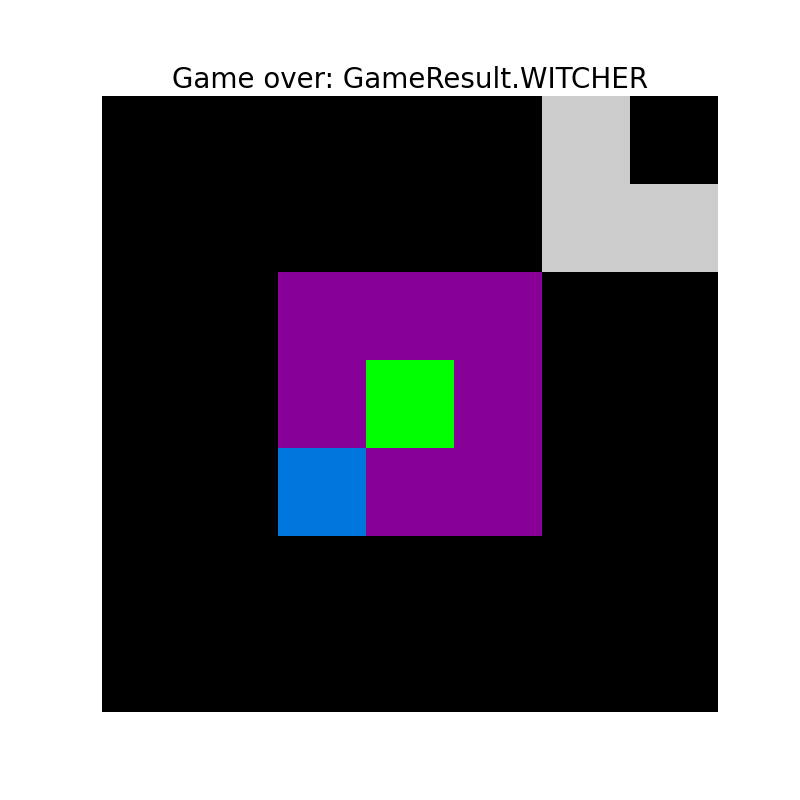

In [3]:
%matplotlib notebook

env = Env(board, initial_state, striga, witcher)
ani = visualize(env)
print(ani)